In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('bikes_rent.csv')

In [3]:
data.head()
# cnt - количество арендованных за день велосипедов (целевой признак)
# season - сезон (1=зима, 2=весна, 3=лето, 4=осень)
# yr - год - 0=2011, 1=2012
# mnth - месяц (1-12)
# holiday - праздничный день (0, 1)
# weekday - день недели (0-6)
# workingday - рабочий день (пн-пт без праздников)
# weathersit - погодные условия (1=Чистое небо или облачно, 2=Туманно, 3=Небольшой снег/дождь, 4=Сильный дождь и снегопад)
# temp - темпиратура
# atemp - темпиратура (какая ощущается)
# hum - влажность
# windspeed - скорость ветра

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [4]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


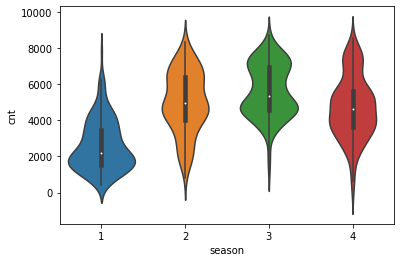

In [5]:
# Просмотреть количество арендованных велосипедов относительно сезона
# Зима - маньше всего прокатов, Лето - больше всего
sns.violinplot(data['season'], data['cnt']);

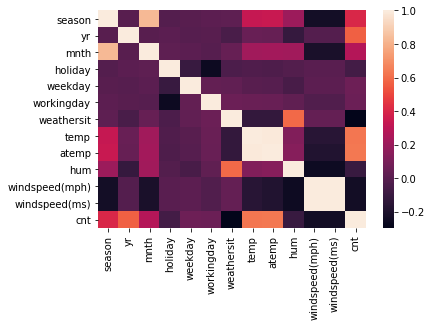

In [6]:
# Просмотрим корреляцию признаков
sns.heatmap(data.corr());

In [7]:
# X_df=Таблица только с признаками (без целевого); y_series=целевой признак
X_df, y_series = data.drop('cnt', axis=1), data['cnt']

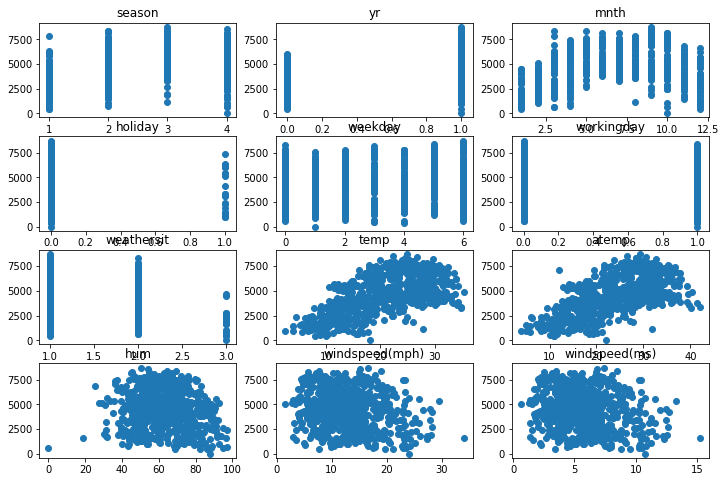

In [8]:
# Построим графики зависимости для каждого признака относительно целевого
# Настройка ширины и длинны графиков
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    # i + 1 - нужно начать нумерацию с 1
    plt.subplot(4, 3, i + 1)
    # plt.scatter(Признак, целевой признак относительно которого строим график)
    plt.scatter(X_df[col], y_series)
    # Указываем название таблицы как у признака
    plt.title(col);

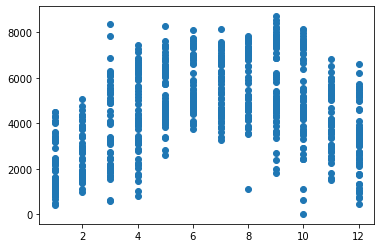

In [9]:
# Отдельно выводим зависимость прокатов относительно месяцев
plt.scatter(data.mnth, data.cnt);
# Квадратичная зависимость - фигура в виде парраболы

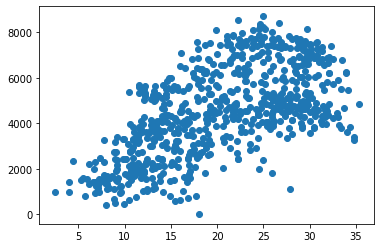

In [10]:
# Зависимость от темпиратуры
plt.scatter(data.temp, data.cnt);
# Тоже паррабола - если слишком жарко, количество прокатов снижается

In [11]:
# LinearRegression - Линейная регрессия - зависимость одной переменной от нескольких в линейной функции (метод наименьших квадратов)
# Lasso, Ridge - линейные модели обучения, позволяющие уменьшить сложность модели 
# и предотвратить переопределение, которое может возникнуть в результате простой линейной регрессии
# LassoCV, RidgeCV - для более быстрого перебора гиперпараметров
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, \
                                Ridge, RidgeCV

In [12]:
# StandardScaler - из каждого признака вычесть его среднее и поделить на стандартное отклонение. Значения масштабируются и приводятся к 0
# Благодаря этому сильно отличающиеся гиперпараметры не испортят обучение
from sklearn.preprocessing import StandardScaler
# mean_squared_error - вычисляет возможность ошибки модели?
from sklearn.metrics import mean_squared_error
# RandomForestRegressor - построение модели случайного леса
from sklearn.ensemble import RandomForestRegressor

In [13]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [14]:
# .values - переводим данные в numpy, чтобы обращаться к столбцам по названию
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

In [15]:
train_part_size = int(.7 * X.shape[0])

X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
# fit_transform - обучить и применить к данным - почему-то, если комментарий сверху, то X_train_scaled не передается значение

In [17]:
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Насколько велосипедов мы ошибаемся
# mean_squared_error(Настоящие ответы, спрогнозированные ответы)
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

1121.7952924380602

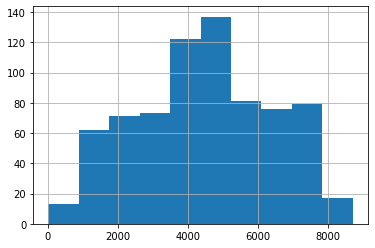

In [19]:
# Построим гистограмму целевого признака
data['cnt'].hist();
# Диапазон прокатов от 0 до 9000 примерно
# Значит ошибка в 1121 нормальная; если было бы 1-10 - ошибка, если 10000 - обучение не удалось

In [20]:
pd.DataFrame(linreg.coef_,
             data.columns[:-1], columns=['coef']).sort_values(by='coef', ascending=False)
# windspeed(ms), windspeed(mph) - взяты очень большие веса, при этом они с разными знаками
# Это влияет и на другие признаки - так модель портится

,coef
windspeed(ms),3.050057e+12
yr,9.540707e+02
atemp,8.911582e+02
season,4.048572e+02
weekday,1.037117e+02
temp,6.249914e+01
mnth,3.081078e+01
workingday,1.470262e+01
holiday,-6.757453e+01
hum,-1.589775e+02


In [34]:
# Функция для построения моделей
def train_validate_report(model, X_train_scaled, y_train, 
                          X_valid_scaled, y_valid, feature_names,
                          forest=False):
    # Функция для линейных моделей и случайного леса
    
    model.fit(X_train_scaled, y_train)
    print('MSE=%f' % np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled))))
    print('Model coefficients:')
    
    # Если модель является лесом = "список по важности признаков", иначе для линейных моделей = "коэффициент"
    coef = model.feature_importances_ if forest else model.coef_
    coef_name = 'Importance' if forest else 'Coef'
    
    
    print(pd.DataFrame(coef,
             feature_names, columns=[coef_name]).sort_values(by=coef_name, ascending=False))

In [22]:
train_validate_report(lasso, X_train_scaled, y_train, 
                          X_valid_scaled, y_valid, feature_names=data.columns[:-1])
# windspeed(ms) - модель выкинула признак в силу идентичности
# atemp, temp - но не выкинула эти признаки, между ними образовалась большая корреляция, хотя признаки по сути одинаковые


MSE=1120.721409
Model coefficients:
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [23]:
train_validate_report(lasso_cv, X_train_scaled, y_train, 
                          X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1120.743661
Model coefficients:
                      coef
yr              951.135002
atemp           883.344030
season          403.009581
weekday         101.892690
temp             69.238981
mnth             28.608639
workingday       13.478682
windspeed(ms)    -0.000000
holiday         -66.360460
hum            -156.248289
windspeed(mph) -186.267734
weathersit     -293.016582


In [24]:
train_validate_report(ridge, X_train_scaled, y_train, 
                          X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1119.560520
Model coefficients:
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [25]:
train_validate_report(ridge_cv, X_train_scaled, y_train, 
                          X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE=1118.903543
Model coefficients:
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


<h2>Обучим модель "Случайный лес"</h2>

In [39]:
# n_estimators - количество постраиваемых деревьев
forest = RandomForestRegressor(random_state=17, n_estimators=500)

In [40]:
train_validate_report(forest, X_train, y_train, 
                          X_valid, y_valid, feature_names=data.columns[:-1], forest=True)
# coef - указывается важность признаков
# Для леса не нужно масштабирование - X_valid_scaled не нужен, можно просто использовать X_valid

MSE=1046.960772
Model coefficients:
                Importance
temp              0.298609
atemp             0.243309
yr                0.199314
hum               0.070565
season            0.062295
weathersit        0.030535
mnth              0.027786
windspeed(mph)    0.020349
weekday           0.019819
windspeed(ms)     0.019613
workingday        0.005191
holiday           0.002615
